# Multi-Label Classification: Google Quest Challenge

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 53.4 MB/s eta 0:00:00


### Import the Required Packages

In [ ]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

### Data Load & Preprocessing

In [ ]:
#import the dataset
df_train = pd.read_csv("/content/train.csv")

In [ ]:
#View first 6 lines
df_train.head()

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,0.000000,1.000000
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,...,0.888889,0.888889,0.555556,0.888889,0.888889,0.666667,0.0,0.000000,0.666667,0.888889
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,...,0.777778,0.777778,0.555556,1.000000,1.000000,0.666667,0.0,0.333333,1.000000,0.888889
3,3,Can an affidavit be used in Beit Din?,"An affidavit, from what i understand, is basic...",Scimonster,https://judaism.stackexchange.com/users/5151,"Sending an ""affidavit"" it is a dispute between...",Y e z,https://judaism.stackexchange.com/users/4794,http://judaism.stackexchange.com/questions/551...,CULTURE,...,0.888889,0.833333,0.333333,0.833333,1.000000,0.800000,0.0,0.000000,1.000000,1.000000
4,5,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,leigero,https://graphicdesign.stackexchange.com/users/...,Check out Image Trace in Adobe Illustrator. \n...,q2ra,https://graphicdesign.stackexchange.com/users/...,http://graphicdesign.stackexchange.com/questio...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,1.000000,1.000000


In [ ]:
#View the structure
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6079 entries, 0 to 6078
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   qa_id                                  6079 non-null   int64  
 1   question_title                         6079 non-null   object 
 2   question_body                          6079 non-null   object 
 3   question_user_name                     6079 non-null   object 
 4   question_user_page                     6079 non-null   object 
 5   answer                                 6079 non-null   object 
 6   answer_user_name                       6079 non-null   object 
 7   answer_user_page                       6079 non-null   object 
 8   url                                    6079 non-null   object 
 9   category                               6079 non-null   object 
 10  host                                   6079 non-null   object 
 11  ques

In [ ]:
df_train_1 = df_train.copy()

In [ ]:
#A list of all the labels available for questions
question_labels = [i for i in df_train.columns if i.startswith("question_")]
#There are 21 Labels and 4 Question related info like title, body and user info

#A list of all the labels available for answers
answer_labels = [i for i in df_train.columns if i.startswith("answer_")]
#There are 9 Labels and 2 Answer related info like user info  

In [ ]:
#Question Labels are values that have a value between 0 to 1(Basically Probability).
#Here we are trying to see what are the values for these labels at following 5 quantiles:
#0%, 25%, 50%, 75% and 100%
#We are taking question_labels from 4 as first 4 are not labels, they are the title, body and 
#user info related to question
for i in question_labels[4:]:
    #Print the label name
    print(i)
    #Print the quantile values
    print(df_train[i].quantile([0,0.25,0.5,0.75,1]))
#     df_train[i].hist()
#     plt.show()

In [ ]:
#Answer Labels are values that have a value between 0 to 1(Basically Probability).
#Here we are trying to see what are the values for these labels at following 5 quantiles:
#0%, 25%, 50%, 75% and 100%
#We are taking answer_labels from 2 as first 2 are not labels, they are the answer and 
#user info related to answer
for i in answer_labels[2:]:
    #Print the answer label
    print(i)
    #print the quantile values
    print(df_train[i].quantile([0,0.25,0.5,0.75,1]))

In [ ]:
#Getting the Value Count for the Label to check if the labels are balanced
df_train.question_not_really_a_question.value_counts()

In [ ]:
for i in question_labels[4:]:
    #Print the label name
    print(i)
    #Print the value counts
    print(df_train[i].value_counts())

#### Initially we are trying to set a threshold of 0.5 and label the questions based on the major label values that we find in the question_labels. To do this we need to have 0 or 1 label values instead of values between 0 to 1.

In [ ]:
#Get the labels with either 0 or 1 values instead of a value in the range 0-1
df_train.iloc[:, 11:] = df_train.iloc[:, 11:].apply(lambda x: pd.Series([1 if val >= 0.5 else 0 for val in x]))

<ipython-input-11-82983c7102ba>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_train.iloc[:, 11:] = df_train.iloc[:, 11:].apply(lambda x: pd.Series([1 if val >= 0.5 else 0 for val in x]))


In [ ]:
df_train.head()

In [ ]:
for i in question_labels[4:]:
    #Print the label name
    print(i)
    #Print the value counts in percentage
    print(df_train[i].value_counts(normalize=True))
    print(df_train[i].value_counts())

#### The Labels are imbalanced based on the analysis of the data that we conducted. Therefore, we need a way to balance the labels so that the model does not become bias on the majority class. Based on the analysis and taking 95% for majority class and 5% for minority class as the distribution, we need to perform oversampling on the labels where the imbalance crosses this threshold.

In [ ]:
df_train['question_asker_intent_understanding'].value_counts().iloc[0]

### OverSampler and Functions

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# # define the oversampling ratio
# oversample_ratio = 0.05/0.95  # desired ratio of majority class to minority class

# # create the oversampler object
# oversampler = RandomOverSampler(sampling_strategy=oversample_ratio, random_state=0)

In [ ]:
# fit and apply the oversampler to the data
# X_resampled, y_resampled = oversampler.fit_resample(df_train.drop("question_asker_intent_understanding", axis=1), df_train['question_asker_intent_understanding'])

In [ ]:
def df_oversampler(df, col, oversample_ratio = 0.05/0.95):
    oversampler = RandomOverSampler(sampling_strategy=oversample_ratio, random_state=0)
    X_resampled, y_resampled = oversampler.fit_resample(df_train.drop(col, axis=1), df_train[col])
    return X_resampled, y_resampled

In [ ]:
def array_oversampler(array_x, array_y, oversample_ratio = 0.05/0.95):
    oversampler = RandomOverSampler(sampling_strategy=oversample_ratio, random_state=0)
    X_resampled, y_resampled = oversampler.fit_resample(array_x, array_y)
    return X_resampled, y_resampled

In [ ]:
X_resampled, y_resampled = df_oversampler(df_train, "question_asker_intent_understanding")

### MODEL MAX SENTENCE LENGTH EDA

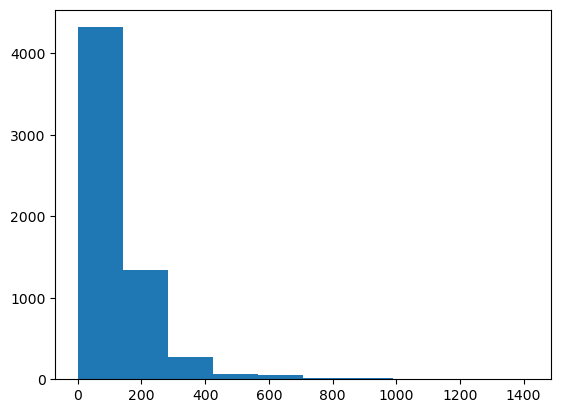

MAX: 1416 
MEDIAN: 92
MEAN: 125.2636946866261
75th Percentile: 154.0
These are the results before any data-preprocessing on the question_body


In [ ]:
#We are trying to determine what should be the allowed maximum length of a sentence

#Create a empty list
length_question_body = []

#Iterate the reviewText and make a list of sentences
for sen in df_train["question_body"]:
  length = len(sen.split())
  length_question_body.append(length)

#Plot a histogram to show the length of each sentence
plt.hist(length_question_body)
plt.show()

#Print the descriptive statistics
print("MAX: {} ".format(max(length_question_body)))
print("MEDIAN: {}".format(statistics.median(length_question_body)))
print("MEAN: {}".format(statistics.mean(length_question_body)))
print("75th Percentile: {}".format(np.percentile(length_question_body, 75)))
print("These are the results before any data-preprocessing on the question_body")

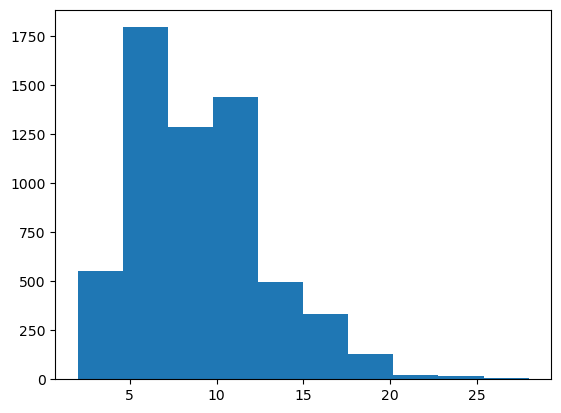

MAX: 28 
MEDIAN: 9
MEAN: 9.034874156933705
75th Percentile: 11.0
These are the results before any data-preprocessing on the question_title


In [ ]:
#We are trying to determine what should be the allowed maximum length of title

#Create a empty list
length_question_title = []

#Iterate the reviewText and make a list of sentences
for sen in df_train["question_title"]:
  length = len(sen.split())
  length_question_title.append(length)

#Plot a histogram to show the length of each sentence
plt.hist(length_question_title)
plt.show()

#Print the descriptive statistics
print("MAX: {} ".format(max(length_question_title)))
print("MEDIAN: {}".format(statistics.median(length_question_title)))
print("MEAN: {}".format(statistics.mean(length_question_title)))
print("75th Percentile: {}".format(np.percentile(length_question_title, 75)))
print("These are the results before any data-preprocessing on the question_title")

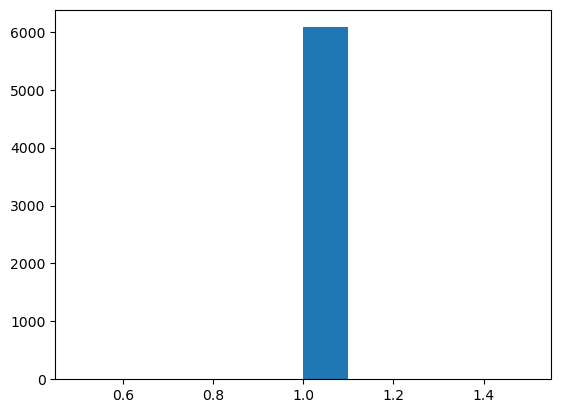

MAX: 1 
MEDIAN: 1
MEAN: 1
These are the results before any data-preprocessing on the category


In [ ]:
#We are trying to determine what should be the allowed maximum length of category

#Create a empty list
length_category = []

#Iterate the reviewText and make a list of sentences
for sen in df_train["category"]:
  length = len(sen.split())
  length_category.append(length)

#Plot a histogram to show the length of each sentence
plt.hist(length_category)
plt.show()

#Print the descriptive statistics
print("MAX: {} ".format(max(length_category)))
print("MEDIAN: {}".format(statistics.median(length_category)))
print("MEAN: {}".format(statistics.mean(length_category)))
print("These are the results before any data-preprocessing on the category")

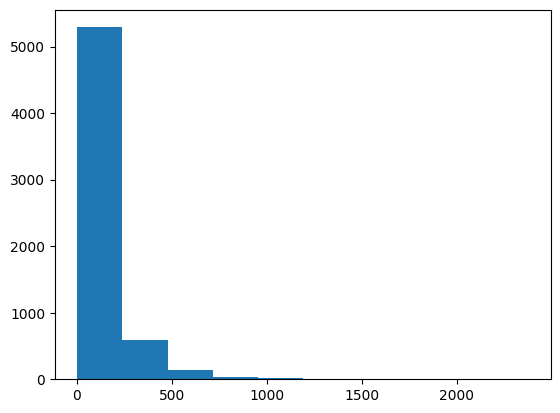

MAX: 2376 
MEDIAN: 88
MEAN: 133.0222075999342
These are the results before any data-preprocessing on the answer


In [ ]:
#We are trying to determine what should be the allowed maximum length of category

#Create a empty list
length_answer = []

#Iterate the reviewText and make a list of sentences
for sen in df_train["answer"]:
  length = len(sen.split())
  length_answer.append(length)

#Plot a histogram to show the length of each sentence
plt.hist(length_answer)
plt.show()

#Print the descriptive statistics
print("MAX: {} ".format(max(length_answer)))
print("MEDIAN: {}".format(statistics.median(length_answer)))
print("MEAN: {}".format(statistics.mean(length_answer)))
print("These are the results before any data-preprocessing on the answer")

Based on the histogram and descriptive statistics of category, question_title and question_body, we determine that the maximum allowed length (max_length) for the 3 attributes are as follows:(Taking 1.5x as factor on 75th Percentile)<br>
category: 1<br>
question_title: 1.5x 11 = 16.5<br>
question_body: 1.5x 154 = 231<br>
answer: 1.5x 133 = 200<br>


### MODEL BUILDING

In [ ]:
cols = ['question_asker_intent_understanding',
       'question_body_critical', 'question_conversational',
       'question_expect_short_answer', 'question_fact_seeking',
       'question_has_commonly_accepted_answer',
       'question_interestingness_others', 'question_interestingness_self',
       'question_multi_intent', 'question_not_really_a_question',
       'question_opinion_seeking', 'question_type_choice',
       'question_type_compare', 'question_type_consequence',
       'question_type_definition', 'question_type_entity',
       'question_type_instructions', 'question_type_procedure',
       'question_type_reason_explanation', 'question_type_spelling',
       'question_well_written', 'answer_helpful',
       'answer_level_of_information', 'answer_plausible', 'answer_relevance',
       'answer_satisfaction', 'answer_type_instructions',
       'answer_type_procedure', 'answer_type_reason_explanation',
       'answer_well_written']

In [ ]:
len(cols)

30

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn
import re
from transformers import AutoTokenizer, AutoModel
from torch.utils.data import Dataset, DataLoader

from nltk import WordNetLemmatizer
# import emoji

# Utility functions from TF
import keras
import tensorflow as tf 
from keras import layers
from keras import losses
from keras import utils
#from tensorflow.keras import preprocessing
from keras.utils import pad_sequences

from tqdm.notebook import tqdm
tqdm.pandas()

# question_title, question_body, answer, category > answer_ labels
# question_title, question_body, category > question_ labels

In [ ]:
MODEL_MAX_LENGTH_qt = 16 
MODEL_MAX_LENGTH_qb = 232
MODEL_MAX_LENGTH_a = 200

bert_tokenizer_category = AutoTokenizer.from_pretrained('bert-base-uncased',
                                          model_max_length = 5,
                                          padding_side = "right",
                                          truncation_side = "right")

bert_tokenizer_qt = AutoTokenizer.from_pretrained('bert-base-uncased',
                                          model_max_length = MODEL_MAX_LENGTH_qt,
                                          padding_side = "right",
                                          truncation_side = "right")
bert_tokenizer_qb = AutoTokenizer.from_pretrained('bert-base-uncased',
                                          model_max_length = MODEL_MAX_LENGTH_qb,
                                          padding_side = "right",
                                          truncation_side = "right")
bert_tokenizer_a = AutoTokenizer.from_pretrained('bert-base-uncased',
                                          model_max_length = MODEL_MAX_LENGTH_a,
                                          padding_side = "right",
                                          truncation_side = "right")

bert_model = AutoModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')

In [ ]:
bert_model.to(device)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [ ]:
# bert_model.eval()
# with torch.no_grad():
#   x = bert_model(**bert_tokenizer_category('INSECT', padding='max_length', truncation='longest_first', return_tensors='pt', return_attention_mask=True, return_token_type_ids=True))['pooler_output'].numpy()
# x

### DATASET AND DATALOADER DEFINITION

In [ ]:
def custom_collate(data): 
    bert_tokenizer_qt = data[0][4]
    bert_tokenizer_qb = data[0][5]
    bert_tokenizer_a = data[0][6]
    bert_tokenizer_category = data[0][7]
    # X = [i[0] for i in data]
    X_qt = [i[0] for i in data]
    X_qb = [i[1] for i in data]
    X_a = [i[2] for i in data]
    X_c = [i[3] for i in data]
    try:
        Y = [i[8] for i in data]
        return bert_tokenizer_qt(X_qt, padding='max_length', truncation='longest_first', return_tensors='pt', return_attention_mask=True, return_token_type_ids=True), bert_tokenizer_qb(X_qb, padding='max_length', truncation='longest_first', return_tensors='pt', return_attention_mask=True, return_token_type_ids=True),  bert_tokenizer_a(X_a, padding='max_length', truncation='longest_first', return_tensors='pt', return_attention_mask=True, return_token_type_ids=True),  bert_tokenizer_category(X_c, padding='max_length', truncation='longest_first', return_tensors='pt', return_attention_mask=True, return_token_type_ids=True), Y
    except:
        return bert_tokenizer_qt(X_qt, padding='max_length', truncation='longest_first', return_tensors='pt', return_attention_mask=True, return_token_type_ids=True), bert_tokenizer_qb(X_qb, padding='max_length', truncation='longest_first', return_tensors='pt', return_attention_mask=True, return_token_type_ids=True),  bert_tokenizer_a(X_a, padding='max_length', truncation='longest_first', return_tensors='pt', return_attention_mask=True, return_token_type_ids=True),  bert_tokenizer_category(X_c, padding='max_length', truncation='longest_first', return_tensors='pt', return_attention_mask=True, return_token_type_ids=True)

In [ ]:
class QA_B_dataset(Dataset):
  def __init__(self, df, cols, bert_tokenizer_qt, bert_tokenizer_qb, bert_tokenizer_a, bert_tokenizer_category, is_test=False, **kwargs):
    super().__init__()
    self.bert_tokenizer_qt = bert_tokenizer_qt
    self.bert_tokenizer_qb = bert_tokenizer_qb
    self.bert_tokenizer_a = bert_tokenizer_a
    self.bert_tokenizer_category = bert_tokenizer_category
    self.X_qt = df['question_title']
    self.X_qb = df['question_body']
    self.X_a = df['answer']
    self.X_c = df['category']
    self.is_test=is_test
    if not self.is_test:
        self.Y = df[cols]
    
  def __len__(self):
    return self.X_qt.shape[0]

  def __getitem__(self, idx):
    # x_encoded = self.tokenizer(self.X[idx], padding='longest', truncation='longest_first', return_tensors='pt', return_attention_mask=True, return_token_type_ids=True)
    if not self.is_test:
        return self.X_qt.iloc[idx], self.X_qb.iloc[idx], self.X_a.iloc[idx], self.X_c.iloc[idx], bert_tokenizer_qt, bert_tokenizer_qb, bert_tokenizer_a, bert_tokenizer_category, self.Y.iloc[idx].values
    else:
        return self.X_qt.iloc[idx], self.X_qb.iloc[idx], self.X_a.iloc[idx], self.X_c.iloc[idx], bert_tokenizer_qt, bert_tokenizer_qb, bert_tokenizer_a, bert_tokenizer_category

In [ ]:
BATCH_SIZE = 64

In [ ]:
dataloader_train = DataLoader(QA_B_dataset(df_train, cols, bert_tokenizer_qt, bert_tokenizer_qb, bert_tokenizer_a, bert_tokenizer_category), batch_size=BATCH_SIZE, collate_fn=custom_collate)

In [ ]:
# 0 - qt
# 1 - qb
# 2 - a
# 3 - c
# code block to get the embeddings per column and appending to a list
bert_model.eval()
X_qt = []
X_qb = []
X_a = []
X_c = []
Y = []
for batch in tqdm(dataloader_train):
    with torch.no_grad():
      output_type = 'pooler_output' # last_hidden_state or pooler_output
      out_qt = bert_model(**batch[0].to(device))[output_type].cpu().numpy()
      out_qb = bert_model(**batch[1].to(device))[output_type].cpu().numpy()
      out_a = bert_model(**batch[2].to(device))[output_type].cpu().numpy()
      out_c = bert_model(**batch[3].to(device))[output_type].cpu().numpy()
    out_y = np.stack(batch[4])
    X_qt.append(out_qt)
    X_qb.append(out_qb)
    X_a.append(out_a)
    X_c.append(out_c)
    Y.append(out_y)

  0%|          | 0/95 [00:00<?, ?it/s]

In [ ]:
# Accumulating all embeddings for each sentence
X_qt = np.concatenate(X_qt).reshape(-1,768)
X_qb = np.concatenate(X_qb).reshape(-1,768)
X_a = np.concatenate(X_a).reshape(-1,768)
X_c = np.concatenate(X_c).reshape(-1,768)
Y = np.concatenate(Y)

In [ ]:
# for questions, we will concatenate only question title, question body and category
X_questions = np.concatenate([X_c, X_qt, X_qb], axis = 1)

# for question answer pair, we will add answer to the concatenation as well
X_answers = np.concatenate([X_c, X_qt, X_qb, X_a], axis = 1)

In [ ]:
X_questions.shape, X_answers.shape, Y.shape

((6079, 2304), (6079, 3072), (6079, 30))

In [ ]:
from sklearn.model_selection import train_test_split

### ONE COLUMN POC MODEL 
question_asker_intent_understanding

In [ ]:
column_for_model = "question_asker_intent_understanding"

In [ ]:
total_rows = X_questions.shape[0]

In [ ]:
X_model = X_questions if column_for_model.startswith("question_") else X_answers
MODEL_MAX_LENGTH = 3*768 if column_for_model.startswith("question_") else 4*768
if df_train[column_for_model].value_counts(normalize = True).iloc[0] > 0.95: # we do resample only when the minority class has less than 5% rows of the total
    X_resampled, y_resampled = array_oversampler(X_model.reshape(total_rows, -1), Y[:,cols.index(column_for_model)])
else:
    X_resampled, y_resampled = X_model, Y[:,cols.index(column_for_model)] # we get the y corresponding to the label under consideration 

In [ ]:
X_resampled = X_resampled.reshape(-1, MODEL_MAX_LENGTH)
y_resampled = pd.get_dummies(y_resampled).values # For keras, labels must be one hot encoded

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled,y_resampled, test_size = 0.25, random_state = 42) # splitting with test being 25%

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((4735, 2304), (1579, 2304), (4735, 2), (1579, 2))

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional, Dropout

In [ ]:
MODEL_MAX_LENGTH = 3*768 if column_for_model.startswith("question_") else 4*768 # n*768 because embedding vectors are stacked

model = keras.Sequential()

model.add(Dense(128, activation = 'tanh', input_shape=(MODEL_MAX_LENGTH,))) # Dense layer 1 which will convert the embeddings to 128 size vector
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'tanh')) # second dense layer which will further reduce the size to 64
model.add(Dropout(0.2))
model.add(Dense(2, activation = 'sigmoid')) # last layer which will output in the range of 0 and 1 for each class. 2 in this case. Choice of activation is sigmoid for probabilities. 
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               295040    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 2)                 130       
                                                                 
Total params: 303,426
Trainable params: 303,426
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 64
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy']) # since it is binary classification, we will use binary crossentropy
history = model.fit(X_train, Y_train, epochs = 5, batch_size=batch_size, verbose = 1, validation_data =(X_test, Y_test)) # we run for 5 epochs with default learning rate

Epoch 1/5
74/74 [==============================] - 3s 10ms/step - loss: 0.2238 - accuracy: 0.9411 - val_loss: 0.1945 - val_accuracy: 0.9512
Epoch 2/5
74/74 [==============================] - 0s 6ms/step - loss: 0.2092 - accuracy: 0.9497 - val_loss: 0.1980 - val_accuracy: 0.9512
Epoch 3/5
74/74 [==============================] - 1s 7ms/step - loss: 0.2070 - accuracy: 0.9497 - val_loss: 0.1996 - val_accuracy: 0.9512
Epoch 4/5
74/74 [==============================] - 1s 8ms/step - loss: 0.2081 - accuracy: 0.9497 - val_loss: 0.1989 - val_accuracy: 0.9512
Epoch 5/5
74/74 [==============================] - 0s 5ms/step - loss: 0.2062 - accuracy: 0.9497 - val_loss: 0.1969 - val_accuracy: 0.9512


### FUNCTION FOR MODEL FOR COLUMN

In [ ]:
from collections import defaultdict

In [ ]:
# This function takes the column as argument and runs a model for that column as is done in the section above for one column 
# steps involved here are concatenation of respective columns, oversampling, train test split, model initialization, training and accuracy calculation
def model_builder(column_for_model):
    global dict_accuracies
    print(f"running for {column_for_model}")
    MODEL_NAME = f"bert_lstm_-_{column_for_model}"

    X_model = X_questions if column_for_model.startswith("question_") else X_answers
    MODEL_MAX_LENGTH = 3*768 if column_for_model.startswith("question_") else 4*768

    if df_train[column_for_model].value_counts(normalize = True).iloc[0] > 0.95:
        X_resampled, y_resampled = array_oversampler(X_model.reshape(total_rows, -1), Y[:,cols.index(column_for_model)])
    else:
        X_resampled, y_resampled = X_model, Y[:,cols.index(column_for_model)]
    
    X_resampled = X_resampled.reshape(-1, MODEL_MAX_LENGTH)
    y_resampled = pd.get_dummies(y_resampled).values

    X_train, X_test, Y_train, Y_test = train_test_split(X_resampled,y_resampled, test_size = 0.25, random_state = 42)

    MODEL_MAX_LENGTH = 3*768 if column_for_model.startswith("question_") else 4*768
    lstm_out = 64 
    # embid_dim = embedding_width # This needs to match the width of our gloVe vectors

    model = keras.Sequential()

    # The big difference here is that the embedding values are set to not trainable
    # model.add(Embedding(vocab_size, embid_dim, input_length =X.shape[1], weights = [embedding_matrix] , trainable = False))
    model.add(Dense(128, activation = 'tanh', input_shape=(MODEL_MAX_LENGTH,)))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation = 'tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation = 'sigmoid'))
    model.summary()

    batch_size = 64
    model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
    history = model.fit(X_train, Y_train, epochs = 10, batch_size=batch_size, verbose = 1, validation_data =(X_test, Y_test))
    print()
    print(column_for_model, end="\n\n")
    print(f"Last Layer Training Accuracy : {history.history['accuracy'][-1]:.2%}")
    print(f"Last Layer Validation Accuracy : {history.history['val_accuracy'][-1]:.2%}")
    dict_accuracies[column_for_model]['training_accuracy'] = history.history['accuracy'][-1]
    dict_accuracies[column_for_model]['validation_accuracy'] = history.history['val_accuracy'][-1]
    print("\n\n\n")
    model.save(f"/content/{MODEL_NAME}")


### MODEL TRAINING LOOP

In [ ]:
# we run for all models and record their respective accuracies in the dictionary 
dict_accuracies = defaultdict(dict)
for col in tqdm(cols[:]):
    model_builder(col)

  0%|          | 0/30 [00:00<?, ?it/s]

running for question_asker_intent_understanding
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 128)               295040    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 2)                 130       
                                                                 
Total params: 303,426
Trainable params: 303,426
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# making a dataframe from the dictionary made above
res_df = pd.DataFrame(dict_accuracies).T

In [ ]:
round_fn = lambda x: round(x*100, 2)
res_df["training_accuracy"] = res_df["training_accuracy"].apply(round_fn)
res_df["validation_accuracy"] = res_df["validation_accuracy"].apply(round_fn)

In [ ]:
res_df
# Final epoch training and validation accuracies for all the models. 30 in total, 21 for questions and 9 for question answer pair. 

,training_accuracy,validation_accuracy
question_asker_intent_understanding,94.97,95.12
question_body_critical,71.07,72.37
question_conversational,95.12,94.69
question_expect_short_answer,78.28,77.76
question_fact_seeking,79.95,81.64
question_has_commonly_accepted_answer,83.64,84.21
question_interestingness_others,73.42,74.74
question_interestingness_self,70.91,71.45
question_multi_intent,77.71,76.78
question_not_really_a_question,95.38,95.74


### PREDICTION

In [ ]:
df_test = pd.read_csv("/content/test.csv")

In [ ]:
df_test.head()

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,host
0,39,Will leaving corpses lying around upset my pri...,I see questions/information online about how t...,Dylan,https://gaming.stackexchange.com/users/64471,There is no consequence for leaving corpses an...,Nelson868,https://gaming.stackexchange.com/users/97324,http://gaming.stackexchange.com/questions/1979...,CULTURE,gaming.stackexchange.com
1,46,Url link to feature image in the portfolio,I am new to Wordpress. i have issue with Featu...,Anu,https://wordpress.stackexchange.com/users/72927,I think it is possible with custom fields.\n\n...,Irina,https://wordpress.stackexchange.com/users/27233,http://wordpress.stackexchange.com/questions/1...,TECHNOLOGY,wordpress.stackexchange.com
2,70,"Is accuracy, recoil or bullet spread affected ...","To experiment I started a bot game, toggled in...",Konsta,https://gaming.stackexchange.com/users/37545,You do not have armour in the screenshots. Thi...,Damon Smithies,https://gaming.stackexchange.com/users/70641,http://gaming.stackexchange.com/questions/2154...,CULTURE,gaming.stackexchange.com
3,132,Suddenly got an I/O error from my external HDD,I have used my Raspberry Pi as a torrent-serve...,robbannn,https://raspberrypi.stackexchange.com/users/17341,Your Western Digital hard drive is disappearin...,HeatfanJohn,https://raspberrypi.stackexchange.com/users/1311,http://raspberrypi.stackexchange.com/questions...,TECHNOLOGY,raspberrypi.stackexchange.com
4,200,Passenger Name - Flight Booking Passenger only...,I have bought Delhi-London return flights for ...,Amit,https://travel.stackexchange.com/users/29089,I called two persons who work for Saudia (tick...,Nean Der Thal,https://travel.stackexchange.com/users/10051,http://travel.stackexchange.com/questions/4704...,CULTURE,travel.stackexchange.com


In [ ]:
dataloader_test = DataLoader(QA_B_dataset(df_test, cols, bert_tokenizer_qt, bert_tokenizer_qb, bert_tokenizer_a, bert_tokenizer_category, is_test=True), batch_size=BATCH_SIZE, collate_fn=custom_collate)

In [ ]:
# doing the same thing as training, but without the Y column here as that is unknown 
bert_model.eval()
X_qt = []
X_qb = []
X_a = []
X_c = []
for batch in tqdm(dataloader_test):
    with torch.no_grad():
      output_type = 'pooler_output' # last_hidden_state or pooler_output
      out_qt = bert_model(**batch[0].to(device))[output_type].cpu().numpy()
      out_qb = bert_model(**batch[1].to(device))[output_type].cpu().numpy()
      out_a = bert_model(**batch[2].to(device))[output_type].cpu().numpy()
      out_c = bert_model(**batch[3].to(device))[output_type].cpu().numpy()
    X_qt.append(out_qt)
    X_qb.append(out_qb)
    X_a.append(out_a)
    X_c.append(out_c)

  0%|          | 0/8 [00:00<?, ?it/s]

In [ ]:
X_qt = np.concatenate(X_qt).reshape(-1,1,768)
X_qb = np.concatenate(X_qb).reshape(-1,1,768)
X_a = np.concatenate(X_a).reshape(-1,1,768)
X_c = np.concatenate(X_c).reshape(-1,1,768)

In [ ]:
# for questions only
X_questions_test = np.concatenate([X_c, X_qt, X_qb], axis = 1)

# for question answer pair
X_answers_test = np.concatenate([X_c, X_qt, X_qb, X_a], axis = 1)

In [ ]:
# funciton that takes in the column or the label to be predicted and predicts it. 
# steps involved here are model loading, X preparation (embedding generation based on type of label), prediction
def model_predict(column_for_model):
    global result_dict
    print(f"running predictions for {column_for_model}")
    MODEL_NAME = f"bert_lstm_-_{column_for_model}"

    X_model = X_questions_test if column_for_model.startswith("question_") else X_answers_test
    MODEL_MAX_LENGTH = 3*768 if column_for_model.startswith("question_") else 4*768

    X_resampled = X_model
    
    X_resampled = X_resampled.reshape(-1, MODEL_MAX_LENGTH)

    MODEL_MAX_LENGTH = 3*768 if column_for_model.startswith("question_") else 4*768

    model = keras.models.load_model(MODEL_NAME)

    batch_size = 64
    Y_pred = model.predict(X_resampled, batch_size=BATCH_SIZE)
    
    Y_pred = Y_pred.argmax(axis = 1) # converting predicted probabilities to 0 and 1

    return Y_pred

In [ ]:
# loop to calculate the predictions by looping over all the labels
result_dict = {}
for col in tqdm(cols): 
    result_dict[col] = model_predict(col)

  0%|          | 0/30 [00:00<?, ?it/s]

running predictions for question_asker_intent_understanding
8/8 [==============================] - 1s 4ms/step
running predictions for question_body_critical
8/8 [==============================] - 1s 5ms/step
running predictions for question_conversational
8/8 [==============================] - 1s 4ms/step
running predictions for question_expect_short_answer
8/8 [==============================] - 1s 5ms/step
running predictions for question_fact_seeking
8/8 [==============================] - 1s 4ms/step
running predictions for question_has_commonly_accepted_answer
8/8 [==============================] - 1s 4ms/step
running predictions for question_interestingness_others
8/8 [==============================] - 1s 4ms/step
running predictions for question_interestingness_self
8/8 [==============================] - 1s 4ms/step
running predictions for question_multi_intent
8/8 [==============================] - 1s 4ms/step
running predictions for question_not_really_a_question
8/8 [=========

In [ ]:
# making a dataframe of just results
df_pred = pd.DataFrame(result_dict)

In [ ]:
# loop to show distribution of predictiosn. 
for col in cols:
    display(df_pred[col].value_counts())

1    475
0      1
Name: question_asker_intent_understanding, dtype: int64

0    267
1    209
Name: question_body_critical, dtype: int64

0    476
Name: question_conversational, dtype: int64

1    476
Name: question_expect_short_answer, dtype: int64

1    476
Name: question_fact_seeking, dtype: int64

1    476
Name: question_has_commonly_accepted_answer, dtype: int64

1    476
Name: question_interestingness_others, dtype: int64

0    365
1    111
Name: question_interestingness_self, dtype: int64

0    476
Name: question_multi_intent, dtype: int64

0    474
1      2
Name: question_not_really_a_question, dtype: int64

0    316
1    160
Name: question_opinion_seeking, dtype: int64

0    475
1      1
Name: question_type_choice, dtype: int64

0    476
Name: question_type_compare, dtype: int64

0    475
1      1
Name: question_type_consequence, dtype: int64

0    475
1      1
Name: question_type_definition, dtype: int64

0    476
Name: question_type_entity, dtype: int64

1    353
0    123
Name: question_type_instructions, dtype: int64

0    476
Name: question_type_procedure, dtype: int64

0    359
1    117
Name: question_type_reason_explanation, dtype: int64

0    476
Name: question_type_spelling, dtype: int64

1    476
Name: question_well_written, dtype: int64

1    475
0      1
Name: answer_helpful, dtype: int64

1    476
Name: answer_level_of_information, dtype: int64

1    474
0      2
Name: answer_plausible, dtype: int64

1    472
0      4
Name: answer_relevance, dtype: int64

1    476
Name: answer_satisfaction, dtype: int64

0    272
1    204
Name: answer_type_instructions, dtype: int64

0    476
Name: answer_type_procedure, dtype: int64

0    245
1    231
Name: answer_type_reason_explanation, dtype: int64

1    466
0     10
Name: answer_well_written, dtype: int64